# Dataset Features Extraction


Notebook By: **Nicolas Escobar Cruz**,
Github:<https://github.com/nicolaxs69>,
Email:<nicoescobar69@gmail.com>

First, import the libraries we will using along the code. **scipy** for the extraction of statistics analysis of data, **matplotlib** for visualization and plotting data, and **numpy** for numeric fuctions operations.

In [24]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

Read the file which contains the dataset and load into an array, parsing this from a String into an integer value. (Be sure your dataset is in the same root or directory that your coding file in order to be load succesfully)

In [25]:
file = 'Conv_S-1_#3.txt' # C:\Users\Nicolas\PycharmProjects\untitled\Dataset\Corriendo\Conv_s-1_#3.txt (using absolute route)
list = [line.rstrip('\n') for line in open(file)]
data = [int(x) for x in list] # Parse String to int
print (data)

[500, 505, 501, 496, 500, 505, 500, 496, 500, 505, 500, 496, 501, 506, 502, 497, 502, 508, 502, 498, 502, 508, 503, 499, 504, 509, 505, 499, 505, 509, 505, 500, 505, 510, 505, 499, 505, 510, 505, 500, 505, 510, 505, 500, 505, 509, 505, 500, 504, 509, 504, 499, 504, 509, 504, 499, 504, 508, 503, 499, 503, 508, 503, 499, 503, 508, 503, 498, 503, 508, 504, 499, 504, 509, 505, 504, 514, 525, 526, 528, 531, 532, 518, 502, 497, 493, 478, 458, 453, 457, 457, 470, 495, 523, 542, 558, 570, 573, 560, 544, 534, 527, 506, 479, 455, 440, 432, 435, 457, 487, 515, 547, 577, 587, 573, 551, 540, 532, 510, 479, 453, 440, 444, 452, 477, 507, 532, 556, 579, 579, 556, 523, 492, 463, 445, 451, 476, 515, 553, 588, 616, 617, 592, 563, 546, 519, 462, 408, 412, 433, 447, 480, 512, 547, 578, 603, 617, 614, 583, 555, 534, 504, 459, 426, 435, 453, 464, 487, 519, 558, 585, 599, 593, 572, 541, 515, 492, 476, 463, 458, 476, 503, 527, 553, 587, 601, 582, 535, 499, 476, 456, 464, 493, 527, 558, 588, 613, 611, 585, 563,

Next is extract statistical information from the data in order to get features that describe the behavior of the data. In this case a seizure

In [26]:
maximo = np.max(data)
minimo = np.min(data)
media  = np.mean(data)
varianza = np.var(data)

a = "Maximo:",maximo
b = "Minimo:",minimo
c = "Media:", media
d = "Varianza:",varianza

print ("Maximo:",maximo)
print ("Minimo:",minimo)
print ("Media:", media)
print("Varianza:",varianza)

Maximo: 769
Minimo: 324
Media: 553.660240291
Varianza: 2731.89115736


Plot the data and the information:

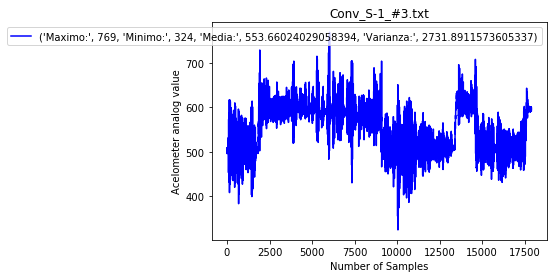

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title(file)
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Acelometer analog value')
ax1.plot(data, c='b', label=a+b+c+d)

leg = ax1.legend()

plt.show()

## Using the preprocessing API from scikit-learn


The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.This is an alternative option to calculte the **mean** an **varianze**.

In [28]:
from sklearn import preprocessing
import numpy as np

Reshape your data either X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.This is necesary to work with preprocessing API.


In [29]:
data_fit = np.array(data).reshape((len(data), -1))
print(data_fit)

[[500]
 [505]
 [501]
 ..., 
 [595]
 [600]
 [595]]


In [30]:
scaler = preprocessing.StandardScaler().fit(data_fit)
print('Media Scalar API:',scaler.mean_)
print('Scala API:', scaler.scale_)
print('Transform API:', scaler.transform(data_fit))

Media Scalar API: [ 553.66024029]
Scala API: [ 52.26749618]
Transform API: [[-1.02664647]
 [-0.93098472]
 [-1.00751412]
 ..., 
 [ 0.79092673]
 [ 0.88658847]
 [ 0.79092673]]


C:\Users\Nicolas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## Fourier transform coefficients


Using the Scipy library to extract the fourier transform, the spectrum of the transform is determined and the fourier coefficients are determined.

In [6]:
from scipy.fftpack import fft, rfft, irfft
import matplotlib.pyplot as plt

In [18]:
file = 'Conv_S-1_#3.txt' 
list = [line.rstrip('\n') for line in open(file)]
data = [int(x) for x in list] # Parse String to int

Fast Fourier Transform:

In [19]:
fft(data)
print (fft(data))

[ 9907750.00000000     +0.j           -78459.60271484-324711.41255406j
  -199728.05423187+130206.38240242j ...,  -130576.77308947+115970.66681559j
  -199728.05423187-130206.38240242j   -78459.60271484+324711.41255406j]


C:\Users\Nicolas\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


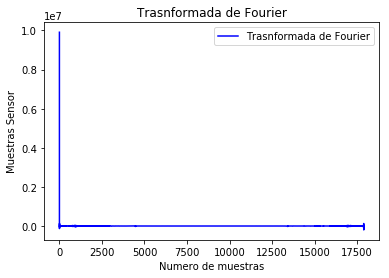

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Trasnformada de Fourier")
ax1.set_xlabel('Numero de muestras')
ax1.set_ylabel('Muestras Sensor')
ax1.plot(fft(data), c='b', label='Trasnformada de Fourier')
leg = ax1.legend()
plt.show()

Using the rfft to calculte the Fourier transform coefficients:

In [20]:
yr = rfft(data)
print (yr)

[  9.90775000e+06  -7.84596027e+04  -3.24711413e+05 ...,   4.46763059e+00
   1.62282073e+02  -1.42453959e+02]


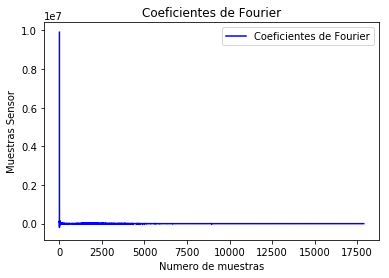

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Coeficientes de Fourier")
ax1.set_xlabel('Numero de muestras')
ax1.set_ylabel('Muestras Sensor')
ax1.plot(yr, c='b', label='Coeficientes de Fourier')
leg = ax1.legend()
plt.show()

# # That's all for now...